In [6]:
import numpy as np
import pandas as pd

data = []
with open('datasets/canadian_wages.txt') as f:
    lines = f.readlines()
    for line in lines:
        data.append(line.split())

data = np.array(data)
data = data[1:]
columns = ["age", "sex", "hourly_wages", "education_years"]
out = pd.DataFrame({columns[ix]: data[:,ix].astype(float) for ix in range(len(columns)) if columns[ix] != "sex"})
out.head()

,age,hourly_wages,education_years
0,40.0,10.56,15.0
1,19.0,11.00,13.0
2,46.0,17.76,14.0
3,50.0,14.00,16.0
4,31.0,8.20,15.0


In [7]:
out.to_csv("datasets/canadian_wages.csv")

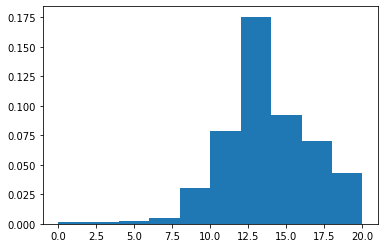

In [19]:
import matplotlib.pyplot as plt

plt.hist(out["education_years"], density=True, bins=10)
plt.show()

In [42]:
import pandas as pd


mortality_data = pd.read_csv("datasets/infant_mortality.csv")
print(mortality_data.shape)
mortality_data.head()

(105, 5)


,country,income,infant_mortality,region,oil
0,Australia,3426,26.7,Asia,no
1,Austria,3350,23.7,Europe,no
2,Belgium,3346,17.0,Europe,no
3,Canada,4751,16.8,Americas,no
4,Denmark,5029,13.5,Europe,no


In [43]:
mortality_data = mortality_data.dropna()

In [44]:
mortality_data

,country,income,infant_mortality,region,oil
0,Australia,3426,26.7,Asia,no
1,Austria,3350,23.7,Europe,no
2,Belgium,3346,17.0,Europe,no
3,Canada,4751,16.8,Americas,no
4,Denmark,5029,13.5,Europe,no
...,...,...,...,...,...
100,Uganda,134,160.0,Africa,no
101,Upper.Volta,82,180.0,Africa,no
102,Southern.Yemen,96,80.0,Asia,no
103,Yemen,77,50.0,Asia,no


In [45]:
mortality_data = mortality_data[["country", "income", "infant_mortality", "region", "oil"]]
mortality_data

,country,income,infant_mortality,region,oil
0,Australia,3426,26.7,Asia,no
1,Austria,3350,23.7,Europe,no
2,Belgium,3346,17.0,Europe,no
3,Canada,4751,16.8,Americas,no
4,Denmark,5029,13.5,Europe,no
...,...,...,...,...,...
100,Uganda,134,160.0,Africa,no
101,Upper.Volta,82,180.0,Africa,no
102,Southern.Yemen,96,80.0,Asia,no
103,Yemen,77,50.0,Asia,no


In [46]:
import matplotlib.pyplot as plt

In [34]:
mortality_data.describe()

,income,infant_mortality
count,105.000000,101.000000
mean,998.066667,89.047525
std,1416.714294,90.801707
min,50.000000,9.600000
25%,123.000000,26.200000
50%,334.000000,60.600000
75%,1191.000000,129.400000
max,5596.000000,650.000000


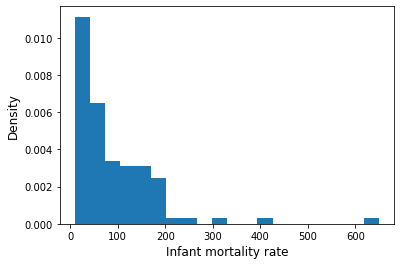

In [37]:
import matplotlib.pyplot as plt

plt.hist(mortality_data["infant_mortality"], bins=20, density=True)
plt.xlabel("Infant mortality rate", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.show()

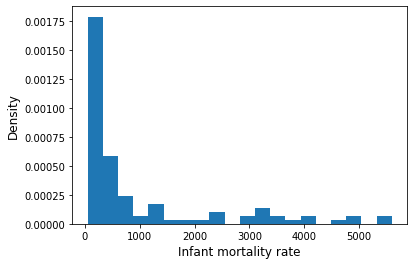

In [38]:
plt.hist(mortality_data["income"], bins=20, density=True)
plt.xlabel("Infant mortality rate", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.show()

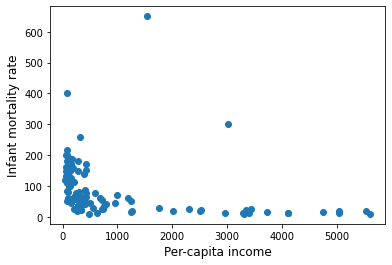

In [45]:
plt.scatter(mortality_data["income"], mortality_data["infant_mortality"])
plt.ylabel("Infant mortality rate", fontsize=12)
plt.xlabel("Per-capita income", fontsize=12)
plt.show()

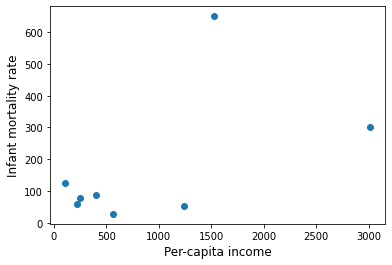

In [46]:
mortality_data_oil_exporting = mortality_data[mortality_data["oil"] == "yes"]

plt.scatter(mortality_data_oil_exporting["income"], mortality_data_oil_exporting["infant_mortality"])
plt.ylabel("Infant mortality rate", fontsize=12)
plt.xlabel("Per-capita income", fontsize=12)
plt.show()

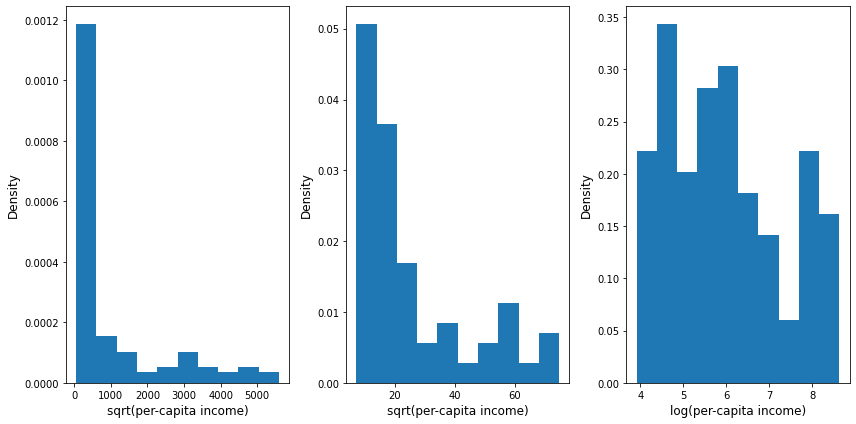

In [57]:
import numpy as np

fig, axs = plt.subplots(nrows= 1, ncols=3, figsize=(12,6))
axs = axs.flatten()

axs[0].hist(mortality_data["income"], bins=10, density=True)
axs[0].set_xlabel("sqrt(per-capita income)", fontsize=12)
axs[0].set_ylabel("Density", fontsize=12)

sqrt_income = np.sqrt(mortality_data["income"])
axs[1].hist(sqrt_income, bins=10, density=True)
axs[1].set_xlabel("sqrt(per-capita income)", fontsize=12)
axs[1].set_ylabel("Density", fontsize=12)

log_income = np.log(mortality_data["income"])
axs[2].hist(log_income, bins=10, density=True)
axs[2].set_xlabel("log(per-capita income)", fontsize=12)
axs[2].set_ylabel("Density", fontsize=12)

plt.tight_layout()
plt.show()

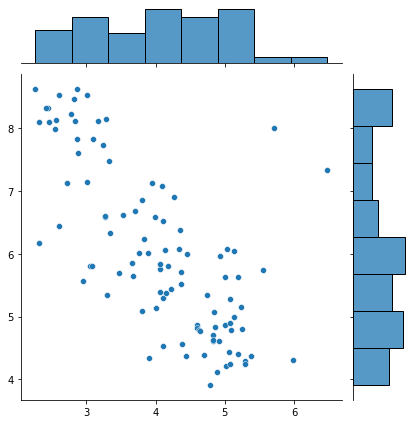

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# calling .to_numpy() on a column of a DataFrame gives you a numpy array back
log_income = np.log(mortality_data["income"].to_numpy())
log_infant_mortality = np.log(mortality_data["infant_mortality"].to_numpy())

sns.jointplot(x=log_infant_mortality, y=log_income)
plt.xlabel("log(Infant mortality rate)", fontsize=12)
plt.ylabel("log(Per-capita income)", fontsize=12)
plt.show()

In [19]:
def pearson_corr(x,y):
    # first compute the means of the two vectors
    x_bar = np.mean(x)
    y_bar = np.mean(y)

    # compute numerator (1/n)*\sum_i (x_i - x_bar)*(y_i - y_bar)
    cov_xy = np.sum((x-x_bar)*(y-y_bar))/len(x)

    # compute the variance of x and y
    var_x = np.sum((x-x_bar)**2)/len(x)
    var_y = np.sum((y-y_bar)**2)/len(y)
    print(var_x, var_y)

    # compute the correlation
    r = cov_xy/np.sqrt(var_x*var_y)

    return r

In [20]:
r = pearson_corr(log_income, log_infant_mortality)
r

1.7797381408699178 0.9284024612726909


-0.7086068160294183

In [21]:
log_infant_mortality

array([3.28466357, 3.16547505, 2.83321334, 2.82137889, 2.60268969,
       2.31253542, 2.55722731, 3.0155349 , 2.87919846, 3.24649099,
       2.45958884, 2.4510051 , 2.78501124, 2.42480273, 3.80220814,
       4.26969745, 2.2617631 , 2.54944517, 2.86220088, 2.8678989 ,
       4.4578296 , 4.36309862, 4.82831374, 3.33576958, 5.70378247,
       4.06044301, 6.47697236, 3.94545778, 4.08765557, 5.13579844,
       4.35670883, 4.13995507, 3.99636415, 3.88773031, 3.32503602,
       4.37071287, 3.09557761, 3.26575941, 2.61006979, 3.4657359 ,
       4.10923317, 3.8286414 , 3.52929738, 4.17592455, 3.0155349 ,
       2.71469474, 2.94968834, 3.26575941, 4.33467294, 3.69882978,
       3.76815264, 5.55682806, 4.1009891 , 4.91998093, 5.19295685,
       4.73619845, 4.06388535, 4.15418456, 3.67122452, 4.92725369,
       3.05870707, 4.06044301, 5.07016127, 5.00394631, 2.32238772,
       3.65325228, 4.21803603, 3.07731226, 3.29583687, 5.03043792,
       4.60517019, 5.99146455, 4.822698  , 5.29831737, 5.01063

In [40]:
def fit_line(x, y):
    # first compute the means of the two vectors
    x_bar = np.mean(x)
    y_bar = np.mean(y)

    # compute numerator (1/n)*\sum_i (x_i - x_bar)*(y_i - y_bar)
    cov_xy = np.sum((x-x_bar)*(y-y_bar))/len(x)

    # compute the variance of x and y
    var_x = np.sum((x-x_bar)**2)/len(x)
    
    # compute beta_hat
    beta_hat = cov_xy/var_x
    
    # compute alpha_hat
    alpha_hat = y_bar - beta_hat*x_bar

    return alpha_hat, beta_hat

In [49]:
alpha_hat, beta_hat = fit_line(log_income, log_infant_mortality)
alpha_hat, beta_hat

(7.14582359796337, -0.5117942628130397)

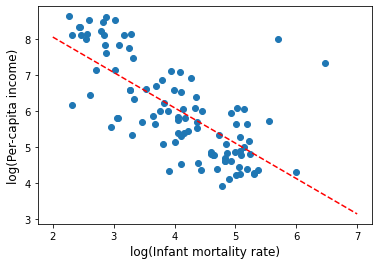

In [27]:
xx = np.linspace(2,7,5)
yy = alpha_hat + beta_hat*xx
plt.scatter(log_infant_mortality, log_income)
plt.plot(xx, yy, color='red', linestyle='--')
plt.xlabel("log(Infant mortality rate)", fontsize=12)
plt.ylabel("log(Per-capita income)", fontsize=12)
plt.show()

In [25]:
import pandas as pd
import numpy as np

out = []
with open('datasets/height_weight.txt') as f:
    lines = f.readlines()
    for j, line in enumerate(lines):
        if j>0:
            print(line.split())
            out.append(line.split())

out= np.array(out)
out[out == 'NA'] = np.nan
columns = ["sex", "weight", "height", "reported_weight", "reported_height"]
out = pd.DataFrame({columns[ix]: out[:,ix+1].astype(float) for ix in range(len(columns)) if columns[ix] != "sex"})

['1', 'M', '77', '182', '77', '180']
['2', 'F', '58', '161', '51', '159']
['3', 'F', '53', '161', '54', '158']
['4', 'M', '68', '177', '70', '175']
['5', 'F', '59', '157', '59', '155']
['6', 'M', '76', '170', '76', '165']
['7', 'M', '76', '167', '77', '165']
['8', 'M', '69', '186', '73', '180']
['9', 'M', '71', '178', '71', '175']
['10', 'M', '65', '171', '64', '170']
['11', 'M', '70', '175', '75', '174']
['12', 'F', '166', '57', '56', '163']
['13', 'F', '51', '161', '52', '158']
['14', 'F', '64', '168', '64', '165']
['15', 'F', '52', '163', '57', '160']
['16', 'F', '65', '166', '66', '165']
['17', 'M', '92', '187', '101', '185']
['18', 'F', '62', '168', '62', '165']
['19', 'M', '76', '197', '75', '200']
['20', 'F', '61', '175', '61', '171']
['21', 'M', '119', '180', '124', '178']
['22', 'F', '61', '170', '61', '170']
['23', 'M', '65', '175', '66', '173']
['24', 'M', '66', '173', '70', '170']
['25', 'F', '54', '171', '59', '168']
['26', 'F', '50', '166', '50', '165']
['27', 'F', '63', 

In [26]:
out = out.dropna()
out["weight"].mean()

66.30386740331491

In [27]:
out= out.dropna()

In [20]:
out.to_csv("datasets/height_weight.csv")

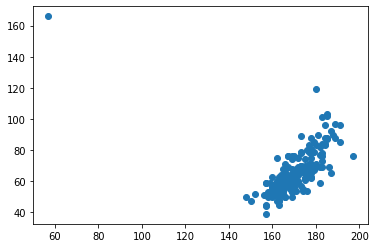

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.scatter(out["height"], out["weight"])
plt.show()

In [50]:
out = out[out["weight"]<=140]

In [53]:
out = out[["height", "weight"]]
out.to_csv("datasets/height_weight.csv")

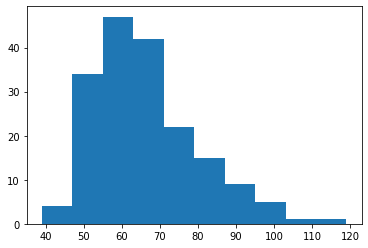

In [52]:
plt.hist(out["weight"], bins=10)
plt.show()

In [38]:
height_weight_data = out

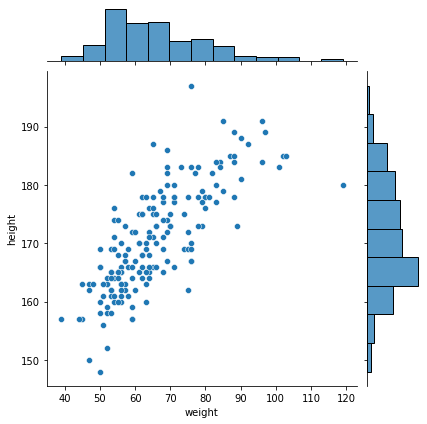

In [39]:
height = height_weight_data["height"]
weight = height_weight_data["weight"]

sns.jointplot(x=weight, y=height)
plt.ylabel("height", fontsize=12)
plt.xlabel("weight", fontsize=12)
plt.show()

alpha = 137.08690903754507, beta = 0.5124931451830912


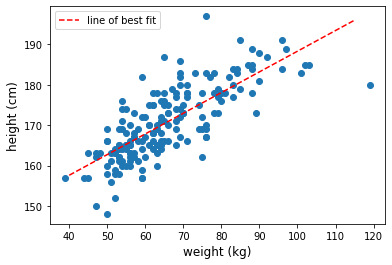

In [41]:
alpha_hat, beta_hat = fit_line(weight, height)
print(f"alpha = {alpha_hat}, beta = {beta_hat}")

xx = np.linspace(40,115,4)
yy = alpha_hat + beta_hat*xx
plt.scatter(weight, height)
plt.plot(xx, yy, color='red', linestyle='--', label='line of best fit')
plt.ylabel("height (cm)", fontsize=12)
plt.xlabel("weight (kg)", fontsize=12)
plt.legend()
plt.show()